# Create a structured pattern in noise

In [1]:
%%writefile -a makeinput.py
import numpy as np
import matplotlib.pyplot as plt

def norm(X):
    return (X-X.min())/(X.max()-X.min())

def vonmises(N_inputs, A, theta, k=2):
    return A*norm(np.exp(k*np.cos(2*np.pi*(np.linspace(0, 1, N_inputs)-theta))))

def cospattern(N_inputs, A, theta, k = 4):
    return A/2*np.cos(np.linspace(0,k*np.pi,N_inputs)+theta)

def linear(N_inputs, A, theta):
    return np.linspace(0,A,N_inputs)

def make_input(nb_syn, noise_density, nb_stim, simtime, patwindow, function=cospattern):
    # draw random gaussian noise spike timings -> shape (nb_syn, nb_ev_noise)
    noise = (np.random.random((nb_syn, int(noise_density*simtime)))*simtime).astype(int)
    # make time references for stimulus repetition -> pattime
    repet = np.linspace(1,nb_stim+1, nb_stim)*simtime/(nb_stim + 2)
    pattime = np.tile(repet,(nb_syn,1))
    # draw stimulus -> stim
    theta = 0
    pattern = np.tile(function(nb_syn, patwindow, theta), (nb_stim,1)).T
    stim = (pattime + pattern).astype(int)
    # make address event representation
    time = (np.hstack([noise,stim]).ravel())
    addr = np.repeat(np.arange(0,nb_syn),stim.shape[1]+noise.shape[1])
    aer = (addr[np.argsort(time)],time[np.argsort(time)])
    return noise, stim, aer

def plot_input(noise, stimulus):
    fig, ax = plt.subplots(figsize = (12, 8))
    ax.eventplot(noise, color='grey');
    ax.eventplot(stimulus, color='red')

Appending to makeinput.py


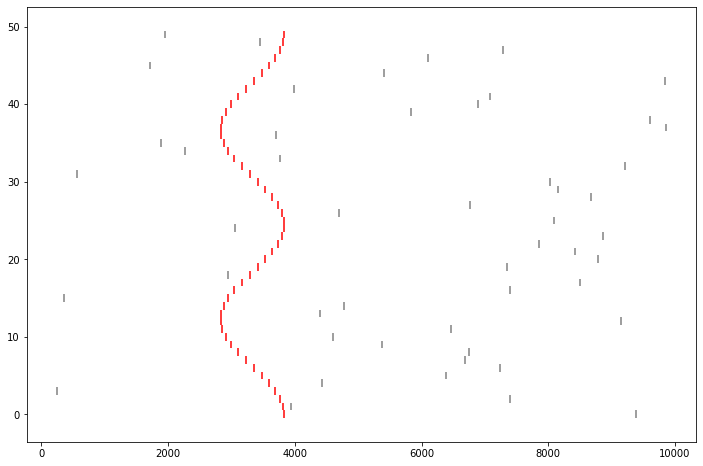

In [2]:
from makeinput import make_input, plot_input, linear, vonmises, cospattern

nb_syn, noise_density, simtime, stimtime = 50, 1e-4, 1e4, 1e3
repetitions = int(simtime/(stimtime*10))
noise, stim, aer = make_input(nb_syn, noise_density, repetitions, simtime, stimtime, function=cospattern)
plot_input(noise, stim)